In [1]:
#import dependancies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

#prior to loading the weather csv into the DataFrame, we changed the original locations from the suburb name of the weather station to the state in Excel

#create variables to hold the location of data sets
weather_loc = "./resources/weatherAUS.csv"
crash_loc = "./resources/Crash_Data.csv"

In [2]:
#bring in weather data
weather_data = pd.read_csv(weather_loc)

#place data into dataframe
weather_df = pd.DataFrame(weather_data)

weather_df


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,1/12/2008,NSW,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2/12/2008,NSW,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,3/12/2008,NSW,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,4/12/2008,NSW,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,5/12/2008,NSW,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,21/06/2017,NT,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,22/06/2017,NT,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,23/06/2017,NT,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,24/06/2017,NT,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [3]:
#create new dataframe that holds date, location and rainfall data
rainfall_df = weather_df[['Date','Location','Rainfall']]

#print to visualise the final DataFrame
rainfall_df

,Date,Location,Rainfall
0,1/12/2008,NSW,0.6
1,2/12/2008,NSW,0.0
2,3/12/2008,NSW,0.0
3,4/12/2008,NSW,0.0
4,5/12/2008,NSW,1.0
...,...,...,...
145455,21/06/2017,NT,0.0
145456,22/06/2017,NT,0.0
145457,23/06/2017,NT,0.0
145458,24/06/2017,NT,0.0


In [4]:
#split the Date into Year, Month and Day
rainfall_df[['Day','Month','Year']] = rainfall_df['Date'].str.split('/',expand=True)

#recreate "Date" within the Dataframe by combining the "Year" & "Month"
rainfall_df['Date'] = rainfall_df['Year']+'-'+rainfall_df['Month']

#drop the columns we aren't going to perform analysis on
rainfall_df= rainfall_df[['Date','Location','Rainfall']]
print(rainfall_df.head())



      Date Location  Rainfall
0  2008-12      NSW       0.6
1  2008-12      NSW       0.0
2  2008-12      NSW       0.0
3  2008-12      NSW       0.0
4  2008-12      NSW       1.0


C:\Users\jtlow\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
<ipython-input-4-38831806d8bf>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rainfall_df['Date'] = rainfall_df['Year']+'-'+rainfall_df['Month']


In [5]:
#check for missing data
print(rainfall_df.count())

#clean dataset
rainfall_cleaned_df=rainfall_df.dropna()


#recheck number of rows to check for missing data
print(rainfall_cleaned_df.count())

Date        145460
Location    145460
Rainfall    142199
dtype: int64
Date        142199
Location    142199
Rainfall    142199
dtype: int64


In [6]:
#group data by the Date that the rain has occurred
rainfall_grouped = rainfall_cleaned_df.groupby('Date')

#sum the rainfall data
simple_rainfall = rainfall_grouped.sum().reset_index() #we reset the index here so we can reference it later

#create a statistical analysis table
simple_rainfall['Rainfall'].describe()

count     113.000000
mean     2970.975221
std      1468.842886
min        15.800000
25%      2135.700000
50%      3017.700000
75%      3846.700000
max      6610.700000
Name: Rainfall, dtype: float64

IQR = 1711.0
Lower Bound = -430.8000000000002
Upper Bound = 6413.2


Text(0, 0.5, 'Rainfall (mm)')

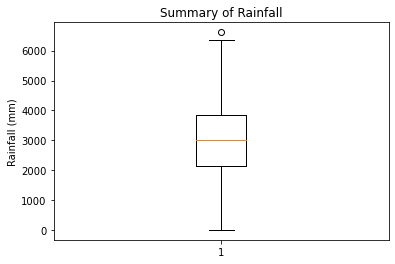

In [7]:
#check for outliers

rain_Q1= 2135.700000
rain_Q3= 3846.700000
rain_IQR = rain_Q3-rain_Q1

rain_lower_b = rain_Q1 - (rain_IQR*1.5)
rain_upper_b =rain_Q3 + (rain_IQR*1.5)

print(f"IQR = {rain_IQR}\nLower Bound = {rain_lower_b}\nUpper Bound = {rain_upper_b}")

#create a boxplot to visualise
plt.boxplot(simple_rainfall['Rainfall'])

#label the plot
plt.title("Summary of Rainfall")
plt.ylabel("Rainfall (mm)")


We can see from the boxplot that there is an outlier and relying on our 1.5 IQR rule, we know that it is a value that is greater than 6413.2

In [8]:
#drop the outlier value
simple_rainfall = simple_rainfall.loc[simple_rainfall['Rainfall']<=rain_upper_b]

#check to see how this has affected our dataset
simple_rainfall.count()

Date        112
Rainfall    112
dtype: int64

In [9]:
#bring in accident data
crash_data = pd.read_csv(crash_loc)

#place data into dataframe
crash_df = pd.DataFrame(crash_data)

#As the month in the rainfall data contains 2 digits for all months, we need to map the Months here to match that
crash_df["Month"] = crash_df["Month"].map("{:02}".format)

crash_df


C:\Users\jtlow\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (10,14,15,16,17) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,...,Age,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Age Group,Day of week,Time of day
0,20212133,Vic,09,2021,Sunday,0:30,Single,NaN,NaN,NaN,...,38,Inner Regional Australia,Melbourne - Outer East,Yarra Ranges (S),Arterial Road,No,No,26_to_39,Weekend,Night
1,20214022,SA,09,2021,Saturday,23:31,Multiple,No,No,No,...,28,Major Cities of Australia,Adelaide - North,Playford (C),NaN,No,No,26_to_39,Weekend,Night
2,20212096,Vic,09,2021,Saturday,23:00,Single,NaN,NaN,NaN,...,19,Inner Regional Australia,Hume,Wangaratta (RC),Access road,No,No,17_to_25,Weekend,Night
3,20212145,Vic,09,2021,Saturday,22:25,Single,NaN,NaN,NaN,...,23,Outer Regional Australia,Hume,Wangaratta (RC),Arterial Road,No,No,17_to_25,Weekend,Night
4,20212075,Vic,09,2021,Saturday,5:15,Single,NaN,NaN,NaN,...,46,Major Cities of Australia,Melbourne - South East,Casey (C),Local Road,No,No,40_to_64,Weekend,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52838,19891246,NSW,01,1989,Wednesday,17:05,Single,Yes,NaN,No,...,5,NaN,NaN,NaN,NaN,No,No,0_to_16,Weekday,Day
52839,19895088,WA,01,1989,Monday,6:00,Single,No,NaN,No,...,19,NaN,NaN,NaN,NaN,Yes,No,17_to_25,Weekday,Day
52840,19895088,WA,01,1989,Monday,6:00,Single,No,NaN,No,...,17,NaN,NaN,NaN,NaN,Yes,No,17_to_25,Weekday,Day
52841,19895088,WA,01,1989,Monday,6:00,Single,No,NaN,No,...,17,NaN,NaN,NaN,NaN,Yes,No,17_to_25,Weekday,Day


In [10]:
#create "Date" within the Dataframe by combining the "Year" & "Month", as to make it easier to merge with the rainfall dataset
crash_df['Date']=crash_df['Year'].astype(str)+"-"+crash_df['Month'].astype(str)

#drop the columns we aren't going to perform analysis on
crash_cleaned_df = crash_df[['Crash ID','State','Date']]

#group data by the Date that the crashes have occurred
crash_grouped_df = crash_cleaned_df.groupby('Date')

#as we're analysing how many crashes there have been, we can get our data from the count function
crash_simple_df = crash_grouped_df.count()

crash_simple_df['State'].describe()

count    393.000000
mean     134.460560
std       35.427478
min       70.000000
25%      107.000000
50%      132.000000
75%      155.000000
max      307.000000
Name: State, dtype: float64

IQR = 48.0
Lower Bound = 35.0
Upper Bound = 227.0


Text(0, 0.5, 'Number of Fatal Road Accidents')

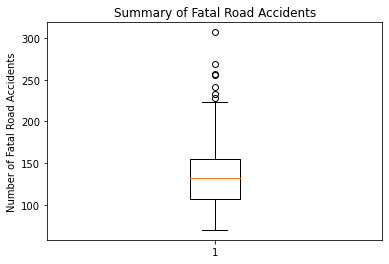

In [11]:
#check for outliers

crash_Q1= 107.000000
crash_Q3= 155.000000
crash_IQR = crash_Q3-crash_Q1

crash_lower_b = crash_Q1 - (crash_IQR*1.5)
crash_upper_b =crash_Q3 + (crash_IQR*1.5)

print(f"IQR = {crash_IQR}\nLower Bound = {crash_lower_b}\nUpper Bound = {crash_upper_b}")

#create a boxplot to visualise
plt.boxplot(crash_simple_df['State'])

#label the plot
plt.title("Summary of Fatal Road Accidents")
plt.ylabel("Number of Fatal Road Accidents")


From the boxplot we can see there is a few datapoints that could be considered outliers, from our 1.5 IQR rule we know that any values greater than 227 could be considered an outlier.

In [12]:
#drop the outlier value
crash_simple_df = crash_simple_df.loc[crash_simple_df['State']<=crash_upper_b]

#check to see how this has affected our dataset
crash_simple_df.count()

Crash ID    386
State       386
dtype: int64

In [13]:
#merge the two datasets
crash_rainfall_df = pd.merge(crash_simple_df,simple_rainfall, on='Date')

#rename columns to be more indicative of the data that it contains
crash_rainfall_df = crash_rainfall_df.rename(columns={'Crash ID':'# of Crashes',
                                                      'Rainfall':'Rainfall (mm)'})

#drop "State" column as it is now unnecessary
crash_rainfall_df = crash_rainfall_df[['Date','# of Crashes','Rainfall (mm)']]

#print DataFrame for visualisation
crash_rainfall_df

,Date,# of Crashes,Rainfall (mm)
0,2007-11,131,95.4
1,2007-12,158,101.0
2,2008-01,112,43.8
3,2008-02,103,323.0
4,2008-03,134,93.4
...,...,...,...
107,2017-02,70,3924.6
108,2017-03,93,6122.4
109,2017-04,102,2815.8
110,2017-05,99,2250.7


The correlation coefficient between the Rainfall (mm) and Number of Crashes is: -0.31
y = -0.003x + 118.21


Text(0.5, 0, 'Rainfall (mm)')

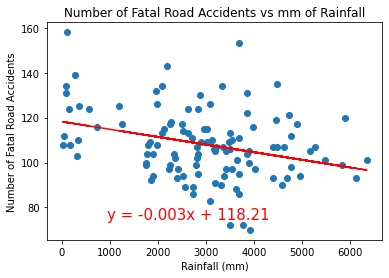

In [14]:
#perform linear regression analysis of our two values, Rainfall and Number of Crashes
(slope,intercept,rvalue,pvalue,stderr)=st.linregress(crash_rainfall_df['Rainfall (mm)'],crash_rainfall_df['# of Crashes'])

#print out correlation coefficient
print(f"The correlation coefficient between the Rainfall (mm) and Number of Crashes is: {rvalue:.2f}")

#calculate lin regress line
line = slope*crash_rainfall_df['Rainfall (mm)']+intercept
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,2))
print(line_eq)

#plot lin gress line and annotate in the plot
plt.plot(crash_rainfall_df['Rainfall (mm)'],line,color='red')
plt.annotate(line_eq,(950,75),fontsize=15,color='red')


#create scatterplot of Rainfall vs Number of Crashes
plt.scatter(crash_rainfall_df['Rainfall (mm)'],crash_rainfall_df['# of Crashes'])

#label the plot
plt.title("Number of Fatal Road Accidents vs mm of Rainfall")
plt.ylabel("Number of Fatal Road Accidents")
plt.xlabel("Rainfall (mm)")